In [18]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_a_ij(i, j):
    # Calcula a_ij conforme a fórmula dada
    return (i * j / (i + j - 1) 
            - ((1 + i) * j + (1 + j) * i) / (i + j) 
            + (1 + (1 + i) * (1 + j)) / (i + j + 1) 
            - 2 / (i + j + 2) 
            + 1 / (i + j + 3))

def calculate_f_i(i):
    # Calcula f_i conforme a fórmula dada
    return 1 / (i + 3) - 1 / (i + 2)

def build_matrix_and_vector(n):
    # Constrói a matriz A e o vetor f para um dado n
    A = np.zeros((n, n))
    f = np.zeros(n)
    for i in range(1, n + 1):
        f[i-1] = calculate_f_i(i)
        for j in range(1, n + 1):
            A[i-1, j-1] = calculate_a_ij(i, j)
    return A, f

def solve_galerkin_method(n):
    # Constrói a matriz e o vetor, resolve o sistema linear e retorna w
    A, f = build_matrix_and_vector(n)
    w = np.linalg.solve(A, f)
    return A, f, w

def ue(x: float) -> float:
    return x - np.sinh(x)/np.sinh(1)

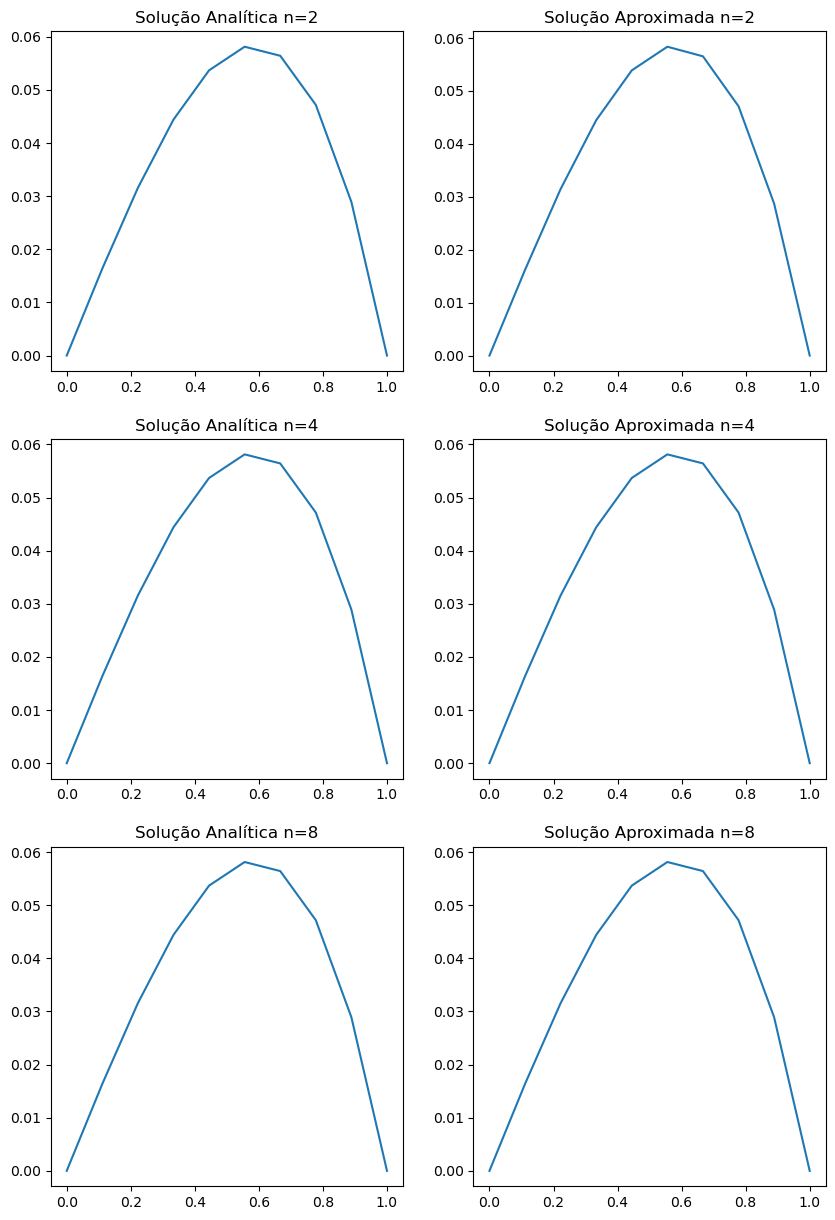

In [23]:
def u_h(x, w):
    n = len(w)
    u_h_val = 0
    for i in range(1, n+1):
        u_h_val += w[i-1] * x**i * (x - 1)
    return u_h_val

x_range = np.linspace(0,1,50)
figure, axis = plt.subplots(3, 2, figsize=(10,15))

for i, n in enumerate([2, 4, 8]):
    A, f, w = solve_galerkin_method(n)
    # print(f"n = {n}:")
    # print("A: \n", A)
    # print("f: \n", f)
    # print("w: \n", f)

    y_e = [ue(xi) for xi in x_range]
    y_h = [u_h(xi, w) for xi in x_range]

    axis[i, 0].plot(x_range, y_e)
    axis[i, 0].set_title(f"Solução Analítica n={n}")

    axis[i, 1].plot(x_range, y_h)
    axis[i, 1].set_title(f"Solução Aproximada n={n}")

plt.savefig("images/exercicio4.png")